In [42]:
import numpy as np
import pandas as pd 
import os 
os.chdir('/Users/Abhi/Downloads/')

In [43]:
df=pd.read_csv('wine-clustering.csv')

In [44]:
# pip install yellowbrick

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns 

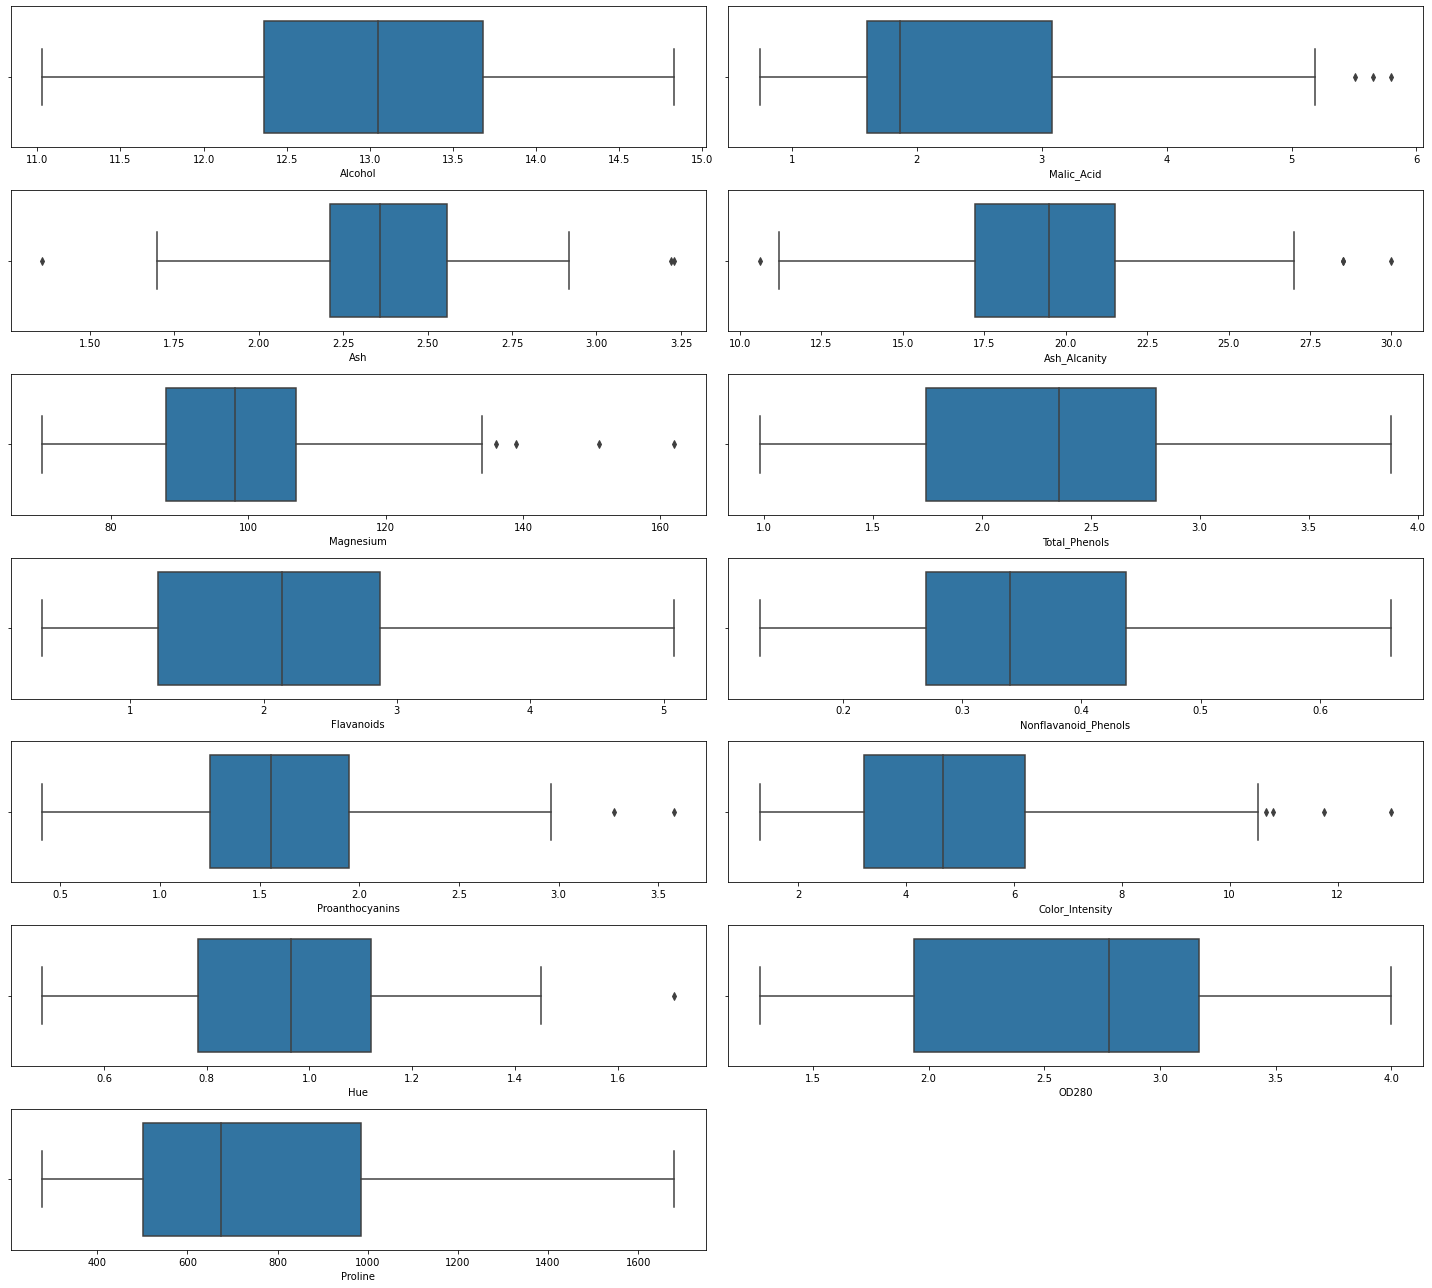

In [49]:
plt.figure(figsize=(20,18))

z=1
for i in df.columns: 
    plt.subplot(7,2,z)
    sns.boxplot(df[i])
    z+=1
    plt.tight_layout()
plt.show()

In [50]:
df.any()

Alcohol                 True
Malic_Acid              True
Ash                     True
Ash_Alcanity            True
Magnesium               True
Total_Phenols           True
Flavanoids              True
Nonflavanoid_Phenols    True
Proanthocyanins         True
Color_Intensity         True
Hue                     True
OD280                   True
Proline                 True
dtype: bool

In [51]:
for i in df.columns:
    q1=np.quantile(df[i],0.25)
    q3=np.quantile(df[i],0.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    df.loc[df[i]>ul,i]=ul
    df.loc[df[i]<ll,i]=ll

In [52]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()

In [59]:
df_s=sc.fit_transform(df)
df_s=pd.DataFrame(df_s,columns=df.columns)

In [60]:
df_s.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


# K means Clustering

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [71]:
n_cluster=[2,3,4,5,6,7,8,9,10]
wcss=[]
sil_scr=[]
for i in n_cluster:
    model=KMeans(n_clusters=i)
    pred=model.fit_predict(df_s)
    sil_scr.append(silhouette_score(df_s,pred))
    wcss.append(model.inertia_)

In [73]:
pd.DataFrame({'WCSS':wcss,'Silhoutte Score':sil_scr},index=n_cluster)

,WCSS,Silhoutte Score
2,1654.906081,0.268303
3,1266.070346,0.285463
4,1168.576325,0.247729
5,1098.147769,0.229670
6,1030.461527,0.191742
7,987.674839,0.142193
8,929.800202,0.167341
9,901.023679,0.147189
10,873.250966,0.140365


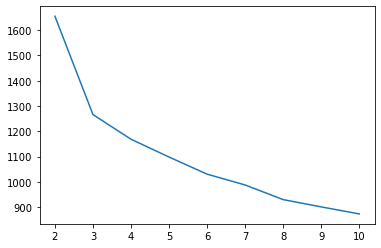

In [76]:
plt.plot(n_cluster,wcss)
plt.show()

In [83]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

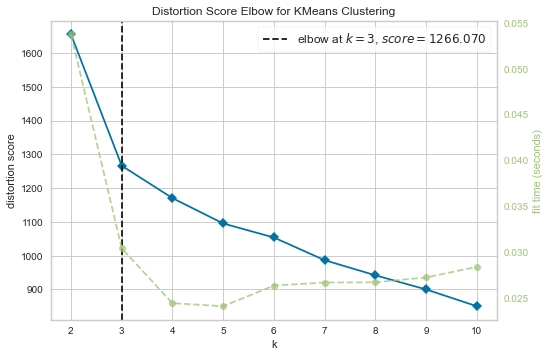

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
model=KMeans()
kv=KElbowVisualizer(model,k=10)
kv.fit(df_s)
kv.show()

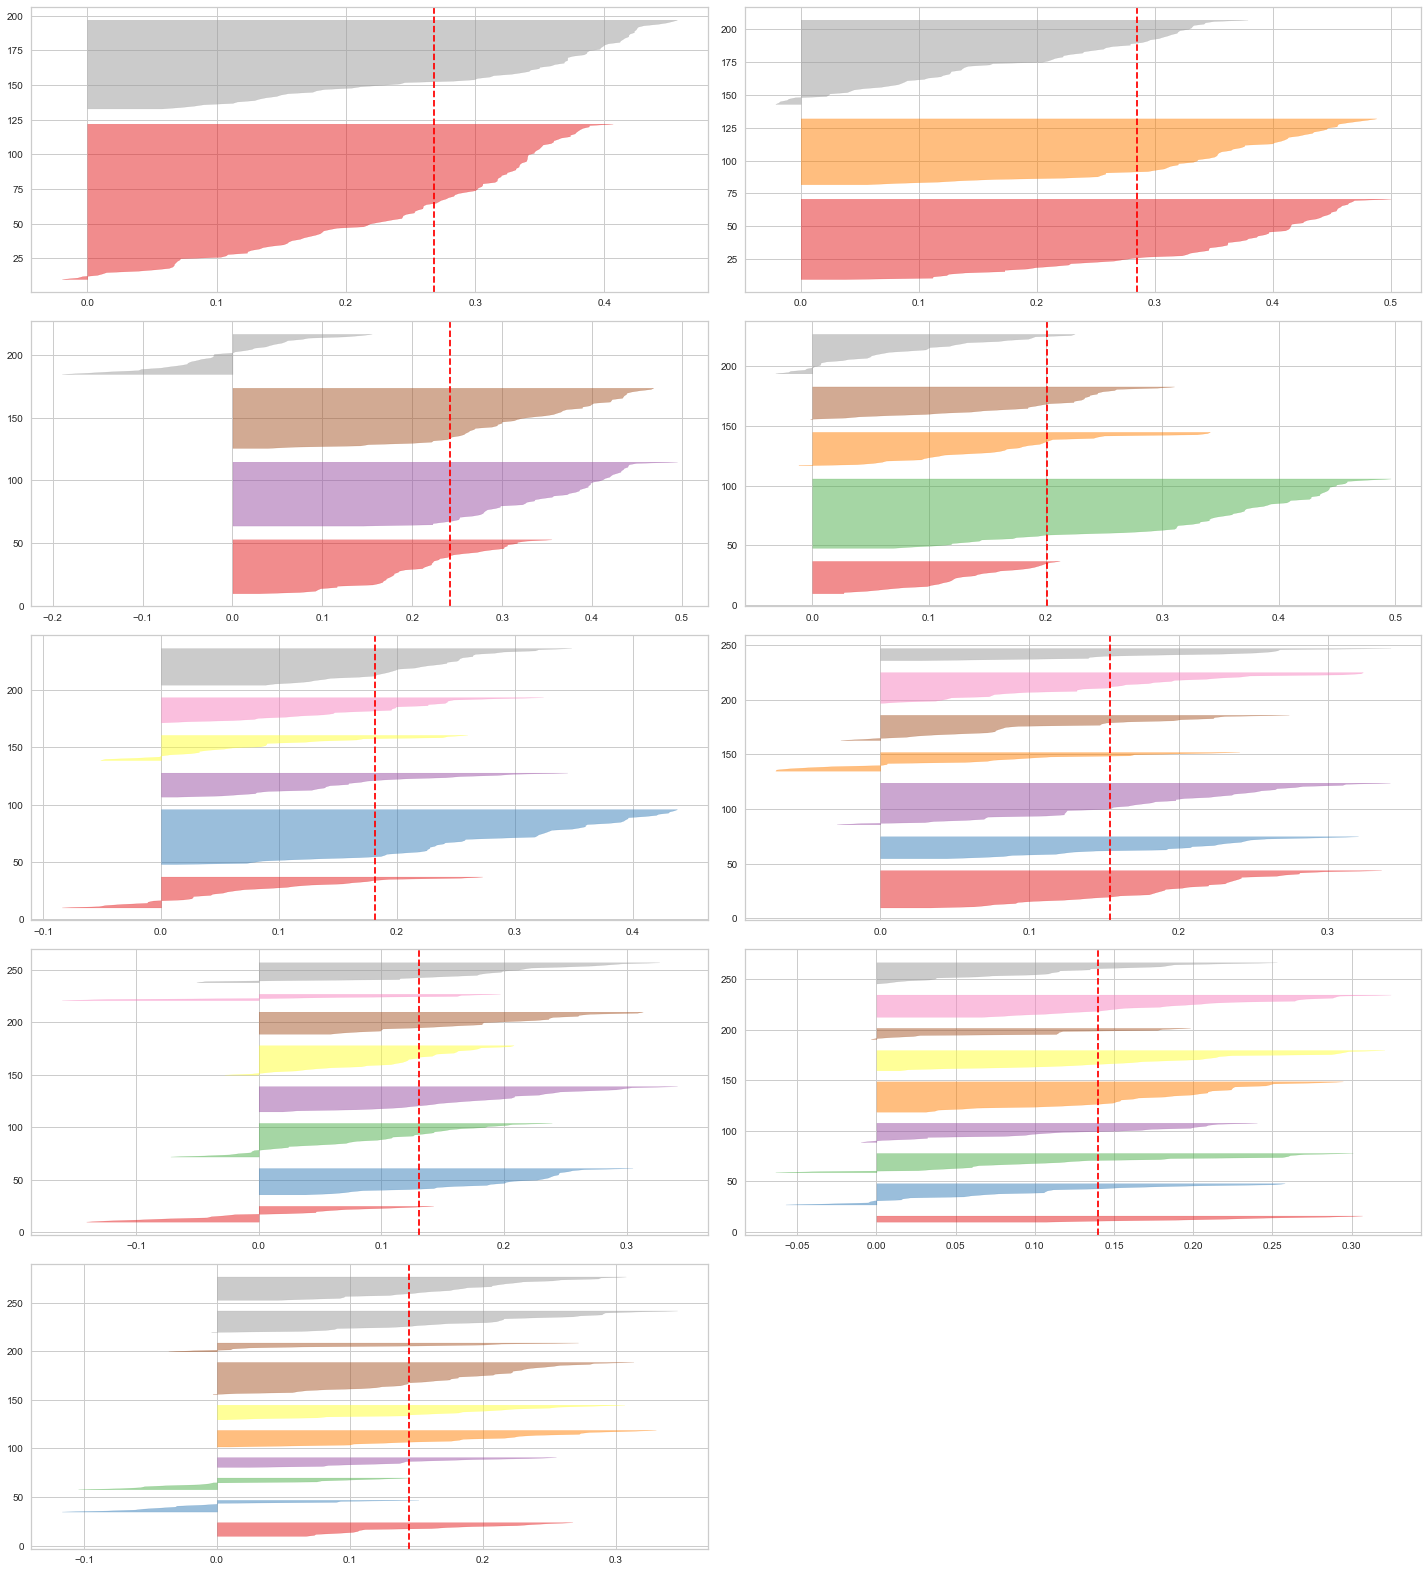

In [84]:
plt.figure(figsize=(20,22))
p=1
for i in n_cluster:
    plt.subplot(5,2,p)
    model=KMeans(n_clusters=i,random_state=10)
    sv=SilhouetteVisualizer(estimator=model)
    sv.fit(df_s)
    p+=1
    
plt.tight_layout()
plt.show()

In [85]:
model1=KMeans(n_clusters=3,random_state=3)
df["Pred_KM"]=model1.fit_predict(df_s)

In [86]:
df["Pred_KM"].value_counts()

0    65
1    62
2    51
Name: Pred_KM, dtype: int64

In [87]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_KM
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [97]:
clust=model1.cluster_centers_

In [94]:
import matplotlib.pyplot as plt

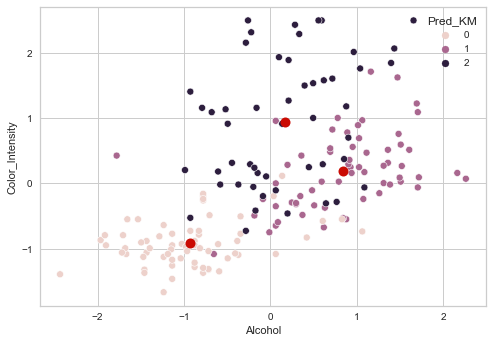

In [99]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',hue=df['Pred_KM'],data=df_s)
plt.plot(clust[0][0],clust[0][9],marker='o',color='r',ms=10)
plt.plot(clust[1][0],clust[1][9],marker='o',color='r',ms=10)
plt.plot(clust[2][0],clust[2][9],marker='o',color='r',ms=10)
plt.show()

# Agglomerative Clustering 

In [101]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

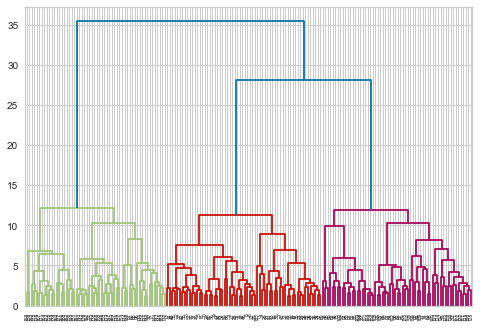

In [102]:
dist=linkage(df_s,method='ward')
dend=dendrogram(dist)

In [103]:
sil=[]
for i in n_cluster:
    model=AgglomerativeClustering(n_clusters=i)
    pred=model.fit_predict(df_s)
    sil.append(silhouette_score(df_s,pred))

In [104]:
pd.DataFrame({'Silhoutte Score':sil},index=n_cluster)

,Silhoutte Score
2,0.267601
3,0.278700
4,0.217224
5,0.185433
6,0.123895
7,0.125373
8,0.127837
9,0.136580
10,0.130254


In [105]:
model2=AgglomerativeClustering(n_clusters=3)
df['Pred Agglo']=model2.fit_predict(df_s)

In [106]:
df['Pred Agglo'].value_counts()

2    62
1    60
0    56
Name: Pred Agglo, dtype: int64

<AxesSubplot:xlabel='Alcohol', ylabel='Color_Intensity'>

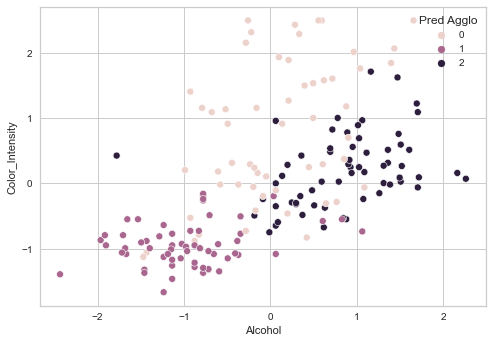

In [107]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',hue=df['Pred Agglo'],data=df_s)

In [108]:
from sklearn.cluster import DBSCAN

# K - distance Plot

In [109]:
# This is used to find the optimal value of episolon 
# eps is the radius of the clusters 

In [110]:
from sklearn.neighbors import NearestNeighbors

In [111]:
nn=NearestNeighbors(n_neighbors=2)
model3=nn.fit(df_s)

In [112]:
distance,index=model3.kneighbors(df_s)

In [114]:
distance=np.sort(distance,axis=0)

In [115]:
distance

array([[0.        , 1.19014985],
       [0.        , 1.19014985],
       [0.        , 1.20023755],
       [0.        , 1.20023755],
       [0.        , 1.22932855],
       [0.        , 1.22932855],
       [0.        , 1.23750114],
       [0.        , 1.23750114],
       [0.        , 1.25486649],
       [0.        , 1.25486649],
       [0.        , 1.30039799],
       [0.        , 1.30039799],
       [0.        , 1.30828329],
       [0.        , 1.30828329],
       [0.        , 1.31144863],
       [0.        , 1.31144863],
       [0.        , 1.32261089],
       [0.        , 1.32261089],
       [0.        , 1.34813554],
       [0.        , 1.35064978],
       [0.        , 1.35755589],
       [0.        , 1.35755589],
       [0.        , 1.35992705],
       [0.        , 1.35992705],
       [0.        , 1.37463701],
       [0.        , 1.37463701],
       [0.        , 1.37518217],
       [0.        , 1.37518217],
       [0.        , 1.37934094],
       [0.        , 1.37934094],
       [0.

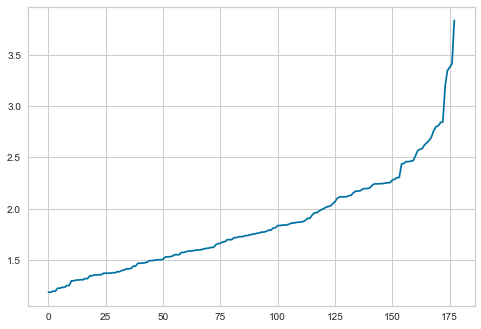

In [116]:
plt.plot(distance[:,1])

In [117]:
# Lets take the value of epsilon 
# eps=2.7


In [118]:
sil_score=[]
for i in range(14,27):
    model=DBSCAN(eps=2.7,min_samples=i)
    pred=model.fit_predict(df_s)
    sil_score.append(silhouette_score(df_s,pred))
    
pd.DataFrame({'Silhoutte Score':sil_score},index=range(14,27))

,Silhoutte Score
14,0.204937
15,0.199546
16,0.192376
17,0.191438
18,0.185247
19,0.180863
20,0.171159
21,0.165561
22,0.147842
23,0.130263


In [119]:
sil_score=[]
for i in range(14,27):
    model=DBSCAN(eps=3,min_samples=i)
    pred=model.fit_predict(df_s)
    sil_score.append(silhouette_score(df_s,pred))
    
pd.DataFrame({'Silhoutte Score':sil_score},index=range(14,27))

,Silhoutte Score
14,0.147153
15,0.147153
16,0.147153
17,0.147153
18,0.142861
19,0.142861
20,0.135104
21,0.133223
22,0.224362
23,0.219169


In [120]:
model4=DBSCAN(eps=3,min_samples=22)
df['Pred DBS']=model4.fit_predict(df_s)

In [121]:
df['Pred DBS'].value_counts()

 0    114
 1     47
-1     17
Name: Pred DBS, dtype: int64

<AxesSubplot:xlabel='Alcohol', ylabel='Color_Intensity'>

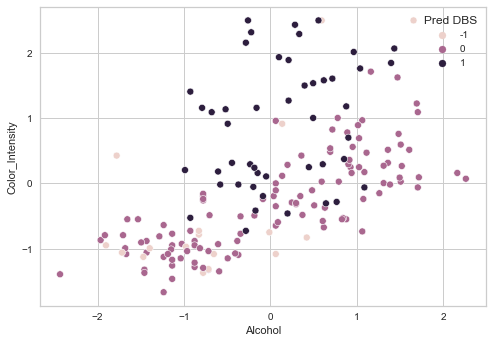

In [122]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',hue=df['Pred DBS'],data=df_s)

# PCA

In [123]:
from sklearn.decomposition import PCA

In [127]:
pca=PCA(n_components=13)
df_p=pca.fit_transform(df_s)

In [131]:
df_p=pd.DataFrame(df_p,columns=range(1,14))

In [132]:
df_p

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187,0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649,-0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401,-1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895,0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559,0.283486,0.036566,-0.577236,-0.165368,-0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,-2.173369,-0.383365,0.925038,-0.633273,-1.060998,0.685717,-0.130305,-0.027147,0.235376,0.111934,0.102554,-0.135217
174,-2.612425,-1.797712,0.210332,0.398412,0.192034,0.011534,0.136131,-0.565178,-0.063488,0.222939,0.236649,-0.309409,-0.181156
175,-2.671169,-2.865301,-0.975126,0.360633,1.185098,0.354148,0.853504,0.013484,0.020689,0.267263,0.595734,0.646957,-0.025525
176,-2.371603,-2.393808,-0.561485,-0.643948,0.658651,1.252325,0.813131,0.351025,0.086492,-0.495366,0.353956,0.346681,-0.083471


In [133]:
var=pca.explained_variance_ratio_

In [134]:
var

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [135]:
add=0
for i in range(13):
    add=add+var[i]
    print('Total Variance Upto PC%s is %.2f'%(i+1,add))

Total Variance Upto PC1 is 0.36
Total Variance Upto PC2 is 0.56
Total Variance Upto PC3 is 0.67
Total Variance Upto PC4 is 0.74
Total Variance Upto PC5 is 0.80
Total Variance Upto PC6 is 0.85
Total Variance Upto PC7 is 0.89
Total Variance Upto PC8 is 0.92
Total Variance Upto PC9 is 0.94
Total Variance Upto PC10 is 0.96
Total Variance Upto PC11 is 0.98
Total Variance Upto PC12 is 0.99
Total Variance Upto PC13 is 1.00


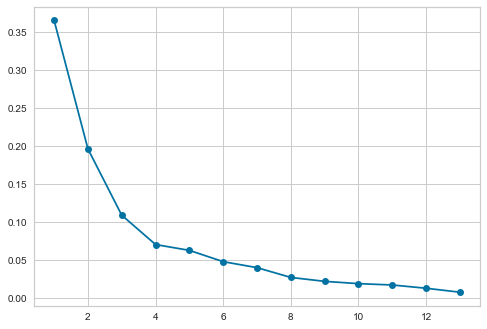

In [136]:
plt.plot(np.arange(1,14),var,marker='o')

# LDA (Linear Discriminant Analaysis )

In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [140]:
df_l=df.drop(['Pred Agglo','Pred DBS'],axis=1)

In [141]:
df_l

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_KM
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [143]:
lda=LinearDiscriminantAnalysis()
df_lda=lda.fit_transform(df_l.drop('Pred_KM',axis=1),df['Pred_KM'])

In [144]:
df_lda

array([[ 5.43464643,  1.93572863],
       [ 4.19282163,  0.65956208],
       [ 3.98266162,  1.06908219],
       [ 4.87629429,  3.60805952],
       [ 2.03812243,  0.67304805],
       [ 4.90715478,  3.08798786],
       [ 4.64699671,  2.28580514],
       [ 4.87760111,  2.83267841],
       [ 3.58776616,  1.57486918],
       [ 3.56378936,  1.26588829],
       [ 5.49051158,  1.96896784],
       [ 3.52711826,  1.56552619],
       [ 3.72016983,  1.52048489],
       [ 5.17910347,  1.5882187 ],
       [ 5.74484195,  2.86926872],
       [ 3.75063361,  2.4863414 ],
       [ 3.97934603,  2.91132972],
       [ 3.51194095,  1.96700905],
       [ 5.85583228,  3.68957833],
       [ 3.46153105,  1.62078874],
       [ 4.1256731 ,  0.80217779],
       [ 2.04624774,  0.35087699],
       [ 5.20419191,  0.54619611],
       [ 3.43693426, -0.06184309],
       [ 3.69828129, -0.15194062],
       [ 3.12342283,  0.39817439],
       [ 4.06924048,  1.60534924],
       [ 2.77502417,  0.80943536],
       [ 4.00848274,

In [145]:
lda.explained_variance_ratio_

array([0.77480087, 0.22519913])

In [146]:
lda_df=pd.DataFrame({'Dis1':df_lda[:,0],'Dis2':df_lda[:,1],'Label':df['Pred_KM']})

<AxesSubplot:xlabel='Dis1', ylabel='Dis2'>

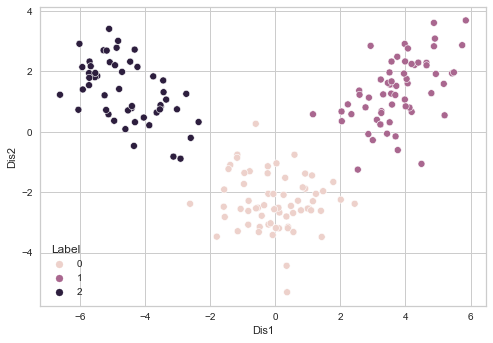

In [147]:
sns.scatterplot(x='Dis1',y='Dis2',hue='Label',data=lda_df)